In [1]:
## COVID19 DETECTION 

# IMPORTING LIBRARIES

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import seaborn as sns
import numpy as np
import os
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
#check if GPU is available
print("GPU", "availble (yessss)" if tf.config.list_logical_devices("GPU") else "not available")

GPU not available


In [3]:
directory = "../Data/Pneumoniadata/"
print(directory)

../Data/Pneumoniadata/


In [4]:
batch_size = 32
IMG_SIZE = (224, 224) # height, weight 


In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=batch_size)

Found 19685 files belonging to 3 classes.
Using 15748 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  directory,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=batch_size)

Found 19685 files belonging to 3 classes.
Using 3937 files for validation.


In [7]:
class_names = train_ds.class_names
OUTPUT_SHAPE = len(class_names) # number of classes in label
print(class_names)

['NiCT', 'nCT', 'pCT']


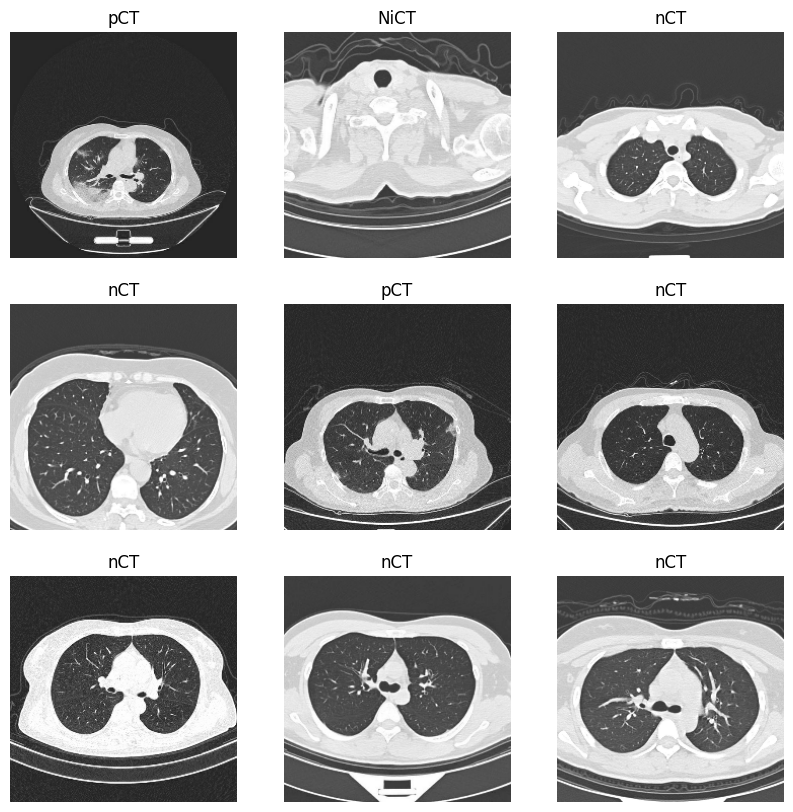

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y), 
              num_parallel_calls=AUTOTUNE)
  ds = ds.cache().prefetch(buffer_size=AUTOTUNE)
  return ds

In [12]:
train_ds = prepare(train_ds, shuffle=True)
val_ds = prepare(val_ds)

In [11]:
num_classes = OUTPUT_SHAPE

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [12]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [14]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
493/493 [==============================] - 393s 795ms/step - loss: 0.1422 - accuracy: 0.9431 - val_loss: 0.0280 - val_accuracy: 0.9888
Epoch 2/3
493/493 [==============================] - 346s 702ms/step - loss: 0.0264 - accuracy: 0.9914 - val_loss: 0.0430 - val_accuracy: 0.9858
Epoch 3/3
493/493 [==============================] - 326s 660ms/step - loss: 0.0201 - accuracy: 0.9938 - val_loss: 0.0333 - val_accuracy: 0.9896


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

In [39]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


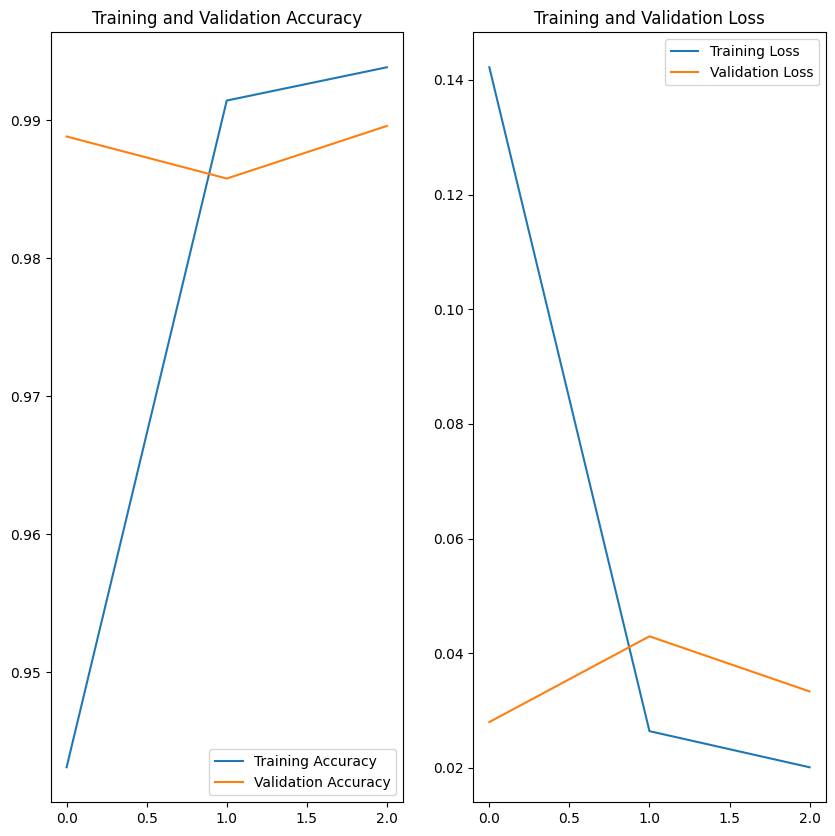

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(3)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
def plot_epoch(model):
    acc = model.history['accuracy']
    val_acc = model.history['val_accuracy']

    loss = model.history['loss']
    val_loss = model.history['val_loss']

    epochs_range = range(3)

    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [ ]:
NUM_EPOCHS = 30

# Creates early stopping for the models when it stops improving
early_Stopping = tf.keras.callbacks.EarlyStopping(monitor = "accuracy", patience = 3) # Stops after 3 rounds of no improvement

In [16]:
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# from keras import optimizers
# def VGG_Simple():
#     model=Sequential()
#     model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=(200,200,1),padding='same',activation='relu',kernel_initializer='uniform'))
#     model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',kernel_initializer='uniform',activation='relu'))
#     model.add(MaxPooling2D((2,2)))
#     model.add(Conv2D(32,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
#     model.add(Conv2D(32,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
#     model.add(MaxPooling2D((2,2)))
#     model.add(Conv2D(16,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
#     model.add(Conv2D(16,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
#     model.add(MaxPooling2D((2,2)))
#     model.add(Flatten())
#     model.add(Dense(64,activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(32,activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(3,activation='softmax'))
#     model.compile(optimizer=optimizers.Adam(lr=0.001,decay=0.05),loss='categorical_crossentropy',metrics=['accuracy'])
#     return model


# from keras.callbacks import Callback,ModelCheckpoint
# class RocAucEvaluation(Callback):
#     def __init__(self, validation_data=()):
#         super(Callback, self).__init__()
#         self.x_val,self.y_val = validation_data
#     def on_epoch_end(self, epoch, log={}):
#         y_pred = self.model.predict(self.x_val)
#         AUC1 = roc_auc_score(self.y_val[:,0], y_pred[:,0])
#         AUC2 = roc_auc_score(self.y_val[:,1], y_pred[:,1])
#         AUC3 = roc_auc_score(self.y_val[:,2], y_pred[:,2])
#         print('val_AUC NiCT epoch:%d: %.6f' % (epoch+1, AUC1))
#         print('val_AUC pCT epoch:%d: %.6f' % (epoch+1, AUC2))
#         print('val_AUC nCT epoch:%d: %.6f' % (epoch+1, AUC3))
#         print()
#         self.model.save(f'Model/temp/CT_epoch_{epoch}.model')

In [15]:
def create_model(model):
    # Initialize the Pretrained Model
    feature_extractor = model(weights='imagenet', 
                                input_shape=(224, 224, 3),
                                include_top=False)

    # Set this parameter to make sure it's not being trained
    feature_extractor.trainable = False

    # Set the input layer
    input_ = tf.keras.Input(shape=(224, 224, 3))

    # Set the feature extractor layer
    x = feature_extractor(input_, training=False)

    # Set the pooling layer
    x = tf.keras.layers.GlobalAveragePooling2D()(x)

    # Set the final layer with sigmoid activation function
    output_ = tf.keras.layers.Dense(OUTPUT_SHAPE, activation='sigmoid')(x)

    # Create the new model object
    model = tf.keras.Model(input_, output_)

    # Compile it
    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    model.build(input_)
    
    return model

## Resnet 50 v2


In [16]:
from tensorflow.keras.applications import ResNet50V2

model1 = create_model(ResNet50V2)
# Print The Summary of The Model
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 23,570,947
Trainable params: 6,147
Non-trainable params: 23,564,800
_________________________________________________________________


In [19]:
resnet_model = model1.fit(train_ds, epochs=NUM_EPOCHS, validation_data=val_ds, validation_freq=2, callbacks=early_Stopping)

Epoch 1/30


c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


493/493 [==============================] - 573s 1s/step - loss: 3.0696 - accuracy: 0.8013
Epoch 2/30
466/493 [===========================>..] - ETA: 30s - loss: 0.8939 - accuracy: 0.8962

KeyboardInterrupt: 

In [ ]:
plot_epoch(resnet_model)

## Mobilenet v3 small


In [ ]:
from tensorflow.keras.applications import MobileNetV3Small
model2 = create_model(MobileNetV3Small)
# Print The Summary of The Model
model2.summary()

4334752/4334752 [==============================] - 1s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d_2   (None, 576)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 3)                 1731      
                                                                 
Total params: 940,851
Trainable params: 1,731
Non-trainable params: 939,120
____________________________________________________

In [ ]:
mobilenetv3_model = model2.fit(train_ds, epochs=NUM_EPOCHS, validation_data=val_ds, validation_freq=2, callbacks=early_Stopping)

In [ ]:
plot_epoch(mobilenetv3_model)

In [21]:
from tensorflow.keras.applications import VGG19
model3 = create_model(VGG19)
# Print The Summary of The Model
model3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d_3   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 20,025,923
Trainable params: 1,539
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
vgg19_model = model3.fit(train_ds, epochs=NUM_EPOCHS, validation_data=val_ds, validation_freq=2, callbacks=early_Stopping)

In [ ]:
plot_epoch(vgg19_model)